In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

# SETUP AND CONFIGURATION

In [7]:
# Set consistent plot styling for clean visualization
plt.style.use('fivethirtyeight')  # Use a clean, publication-ready style
sns.set_palette("bright")  # Set color palette for better visual distinction
plt.rcParams['figure.figsize'] = (12, 8)  # Default figure size for readability
plt.rcParams['font.size'] = 12  # Readable font size for plots

# DATA LOADING AND INITIAL EXPLORATION

In [6]:
# Load the F1 performance dataset (2018-2024 seasons)
df = pd.read_csv('f1_performance_2018_2024.csv')

In [8]:
# Perform basic exploratory analysis to understand data dimensions and statistics
print("\nDataset Shape:", df.shape)
print("\nBasic Statistics:")
print(df.describe())


Dataset Shape: (35, 8)

Basic Statistics:
              Year  Driver Experience  Average Qualifying Position  \
count    35.000000          35.000000                    35.000000   
mean   2021.000000           9.200000                     5.685714   
std       2.029199           4.275787                     3.065668   
min    2018.000000           1.000000                     1.500000   
25%    2019.000000           6.000000                     3.500000   
50%    2021.000000           9.000000                     5.000000   
75%    2023.000000          12.000000                     7.500000   
max    2024.000000          18.000000                    14.000000   

       Average Race Position  Pit Stops  Fastest Lap Times  Driver Points  
count              35.000000  35.000000          35.000000      35.000000  
mean                5.242857   2.065714          85.200000     242.857143  
std                 2.847526   0.083817           2.698584     136.036953  
min                 1.

In [9]:
# Check for missing values that could affect analysis
print("\nMissing Values Check:")
print(df.isnull().sum())


Missing Values Check:
Year                           0
Driver                         0
Driver Experience              0
Average Qualifying Position    0
Average Race Position          0
Pit Stops                      0
Fastest Lap Times              0
Driver Points                  0
dtype: int64


In [10]:
# Verify data types to ensure proper handling in analysis
print("\nData Types:")
print(df.dtypes)


Data Types:
Year                             int64
Driver                          object
Driver Experience                int64
Average Qualifying Position    float64
Average Race Position          float64
Pit Stops                      float64
Fastest Lap Times              float64
Driver Points                  float64
dtype: object


# DATA PREPROCESSING

In [11]:
# Rename columns to follow Python naming conventions (underscores instead of spaces)
df = df.rename(columns={
    'Driver Experience': 'Driver_Experience',
    'Average Qualifying Position': 'Avg_Qualifying_Position',
    'Average Race Position': 'Avg_Race_Position',
    'Pit Stops': 'Pit_Stops',
    'Fastest Lap Times': 'Fastest_Lap_Times',
    'Driver Points': 'Driver_Points'
})

# EXPLORATORY DATA ANALYSIS (EDA)

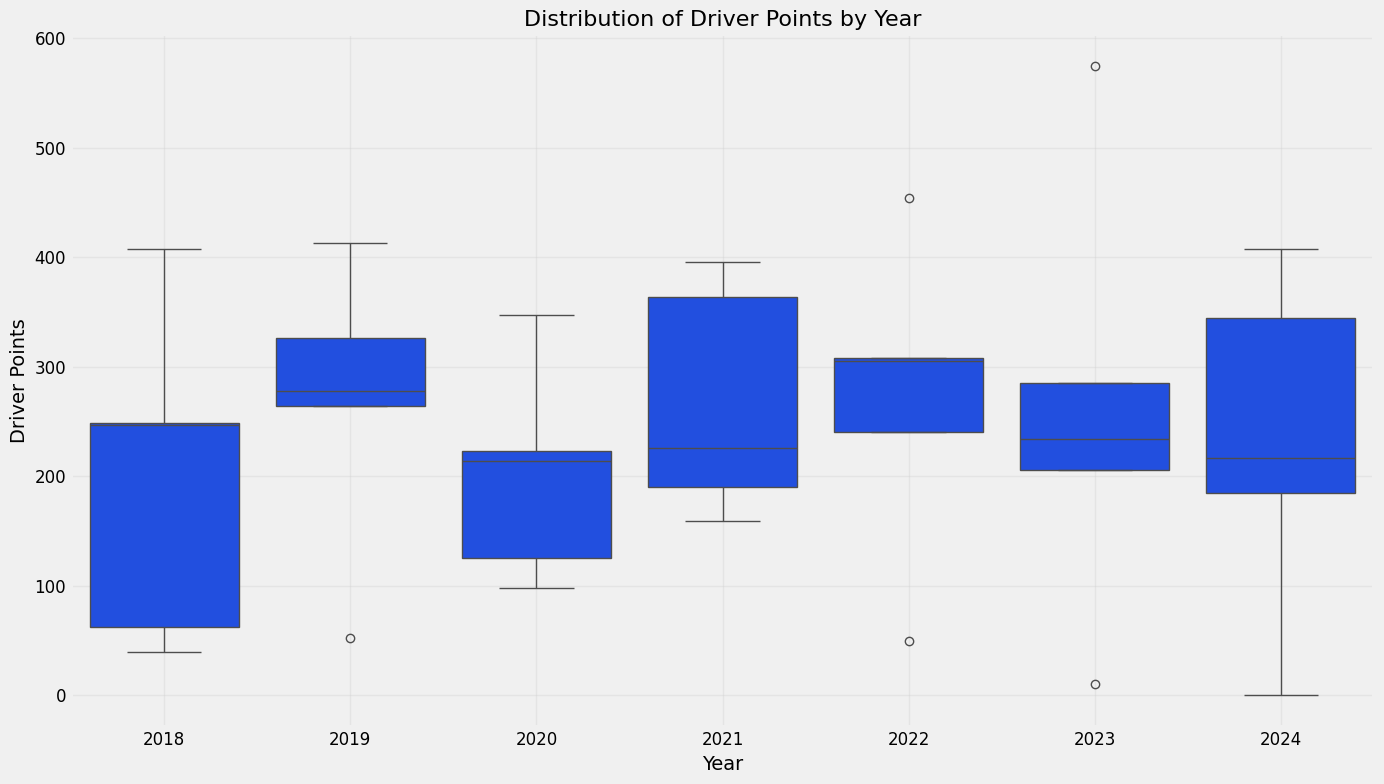

In [12]:
# 1. TEMPORAL ANALYSIS: Points Distribution by Year
# Visualize how driver points distribution has changed across seasons
plt.figure(figsize=(14, 8))
sns.boxplot(x='Year', y='Driver_Points', data=df)
plt.title('Distribution of Driver Points by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Driver Points', fontsize=14)
plt.grid(True, alpha=0.3)  # Add subtle grid for better readability
plt.tight_layout()  # Optimize layout for better display
plt.show()

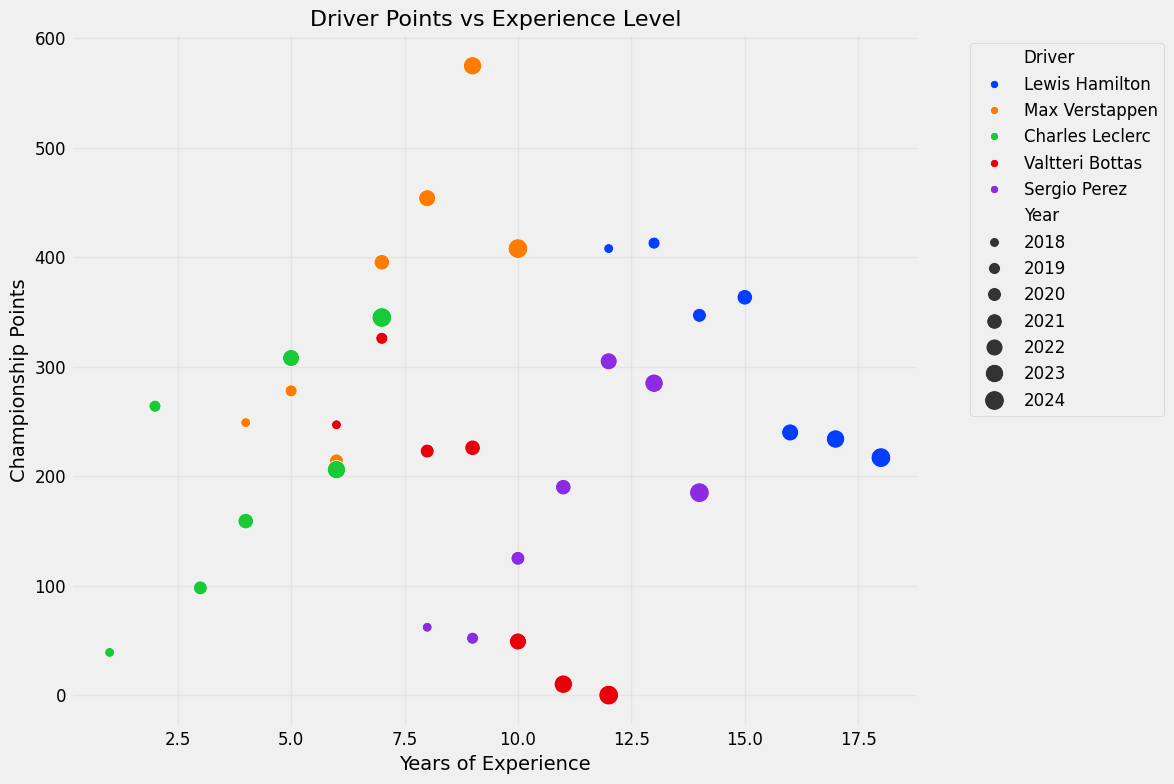

In [13]:
# 2. EXPERIENCE ANALYSIS: Points vs Experience
# Analyze relationship between driver experience and championship points
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Driver_Experience', y='Driver_Points', hue='Driver',
                size='Year', sizes=(50, 200), data=df)
plt.title('Driver Points vs Experience Level', fontsize=16)
plt.xlabel('Years of Experience', fontsize=14)
plt.ylabel('Championship Points', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Position legend outside plot area
plt.tight_layout()
plt.show()

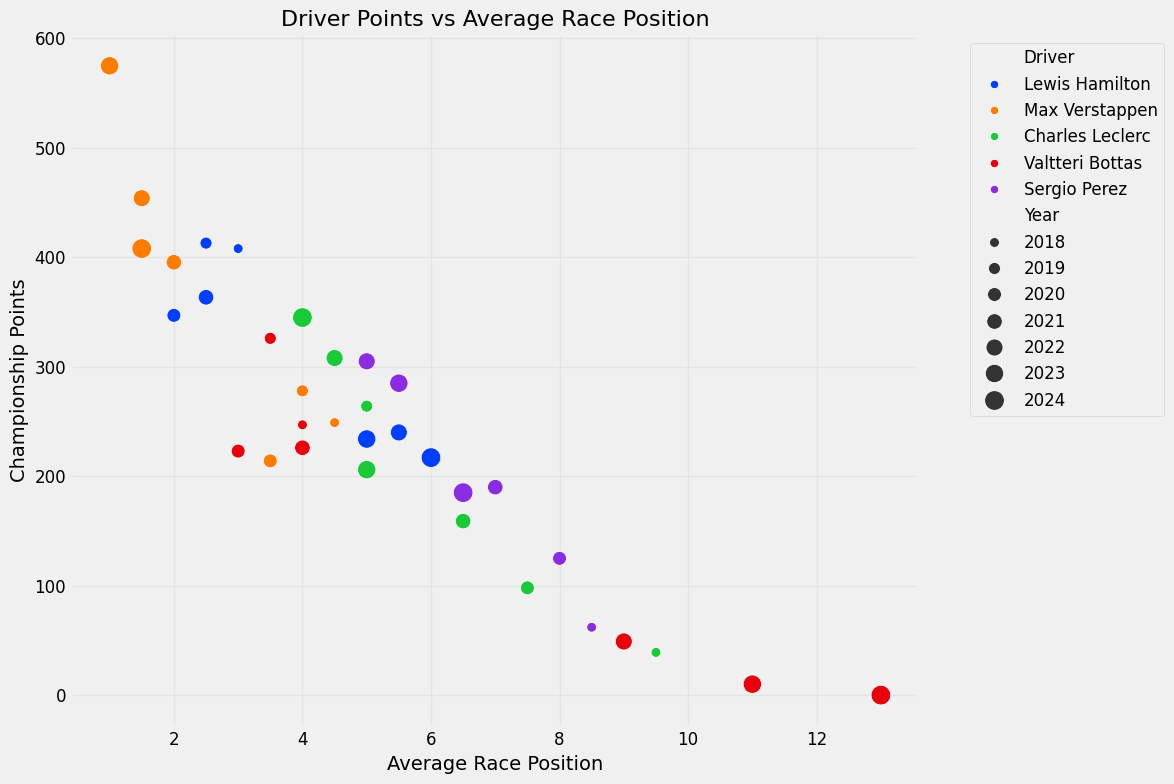

In [14]:
# 3. POSITION ANALYSIS: Points vs Race Position
# Examine how average race finishing position correlates with championship points
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Avg_Race_Position', y='Driver_Points',
                hue='Driver', size='Year', sizes=(50, 200), data=df)
plt.title('Driver Points vs Average Race Position', fontsize=16)
plt.xlabel('Average Race Position', fontsize=14)
plt.ylabel('Championship Points', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

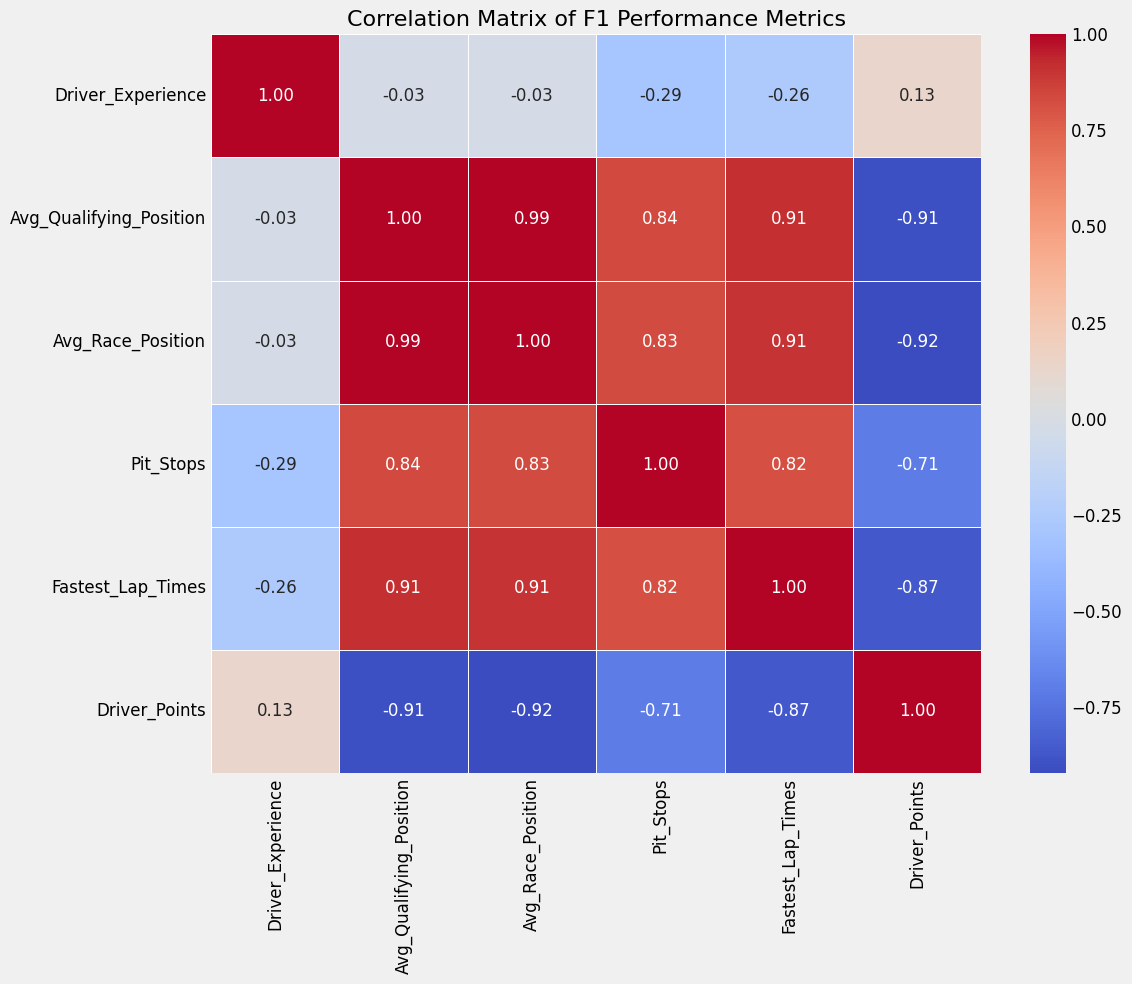

In [15]:
# 4. CORRELATION ANALYSIS: Identify relationships between key performance metrics
plt.figure(figsize=(12, 10))
feature_cols = ['Driver_Experience', 'Avg_Qualifying_Position', 'Avg_Race_Position',
                'Pit_Stops', 'Fastest_Lap_Times', 'Driver_Points']
correlation = df[feature_cols].corr()  # Calculate correlation matrix
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of F1 Performance Metrics', fontsize=16)
plt.tight_layout()
plt.show()

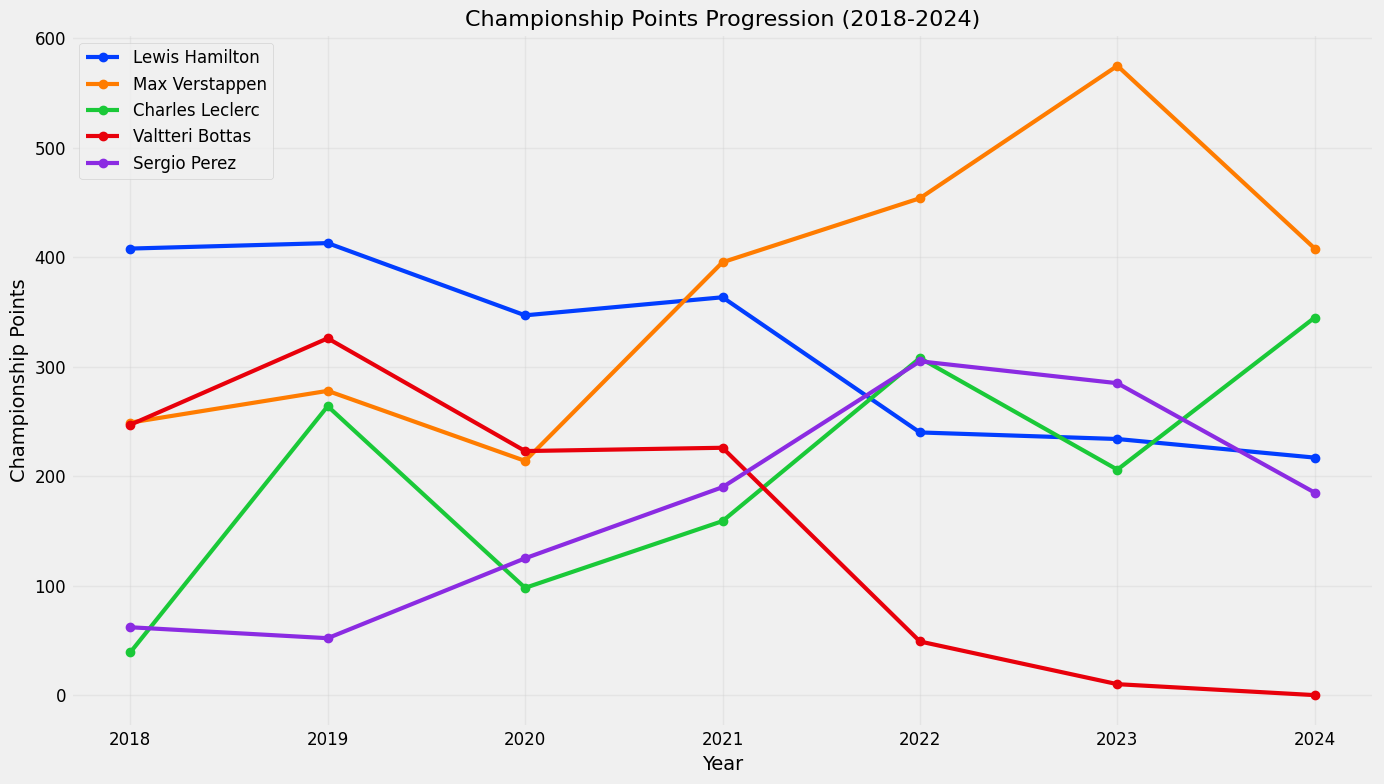

In [16]:
# 5. LONGITUDINAL ANALYSIS: Points Progression For Key Drivers
# Track performance of top drivers across multiple seasons
key_drivers = ['Lewis Hamilton', 'Max Verstappen', 'Charles Leclerc', 'Valtteri Bottas', 'Sergio Perez']
plt.figure(figsize=(14, 8))
for driver in key_drivers:
    driver_data = df[df['Driver'] == driver]
    plt.plot(driver_data['Year'], driver_data['Driver_Points'], marker='o', label=driver, linewidth=3)

plt.title('Championship Points Progression (2018-2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Championship Points', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.xticks(df['Year'].unique())  # Ensure all years are shown on x-axis
plt.tight_layout()
plt.show()

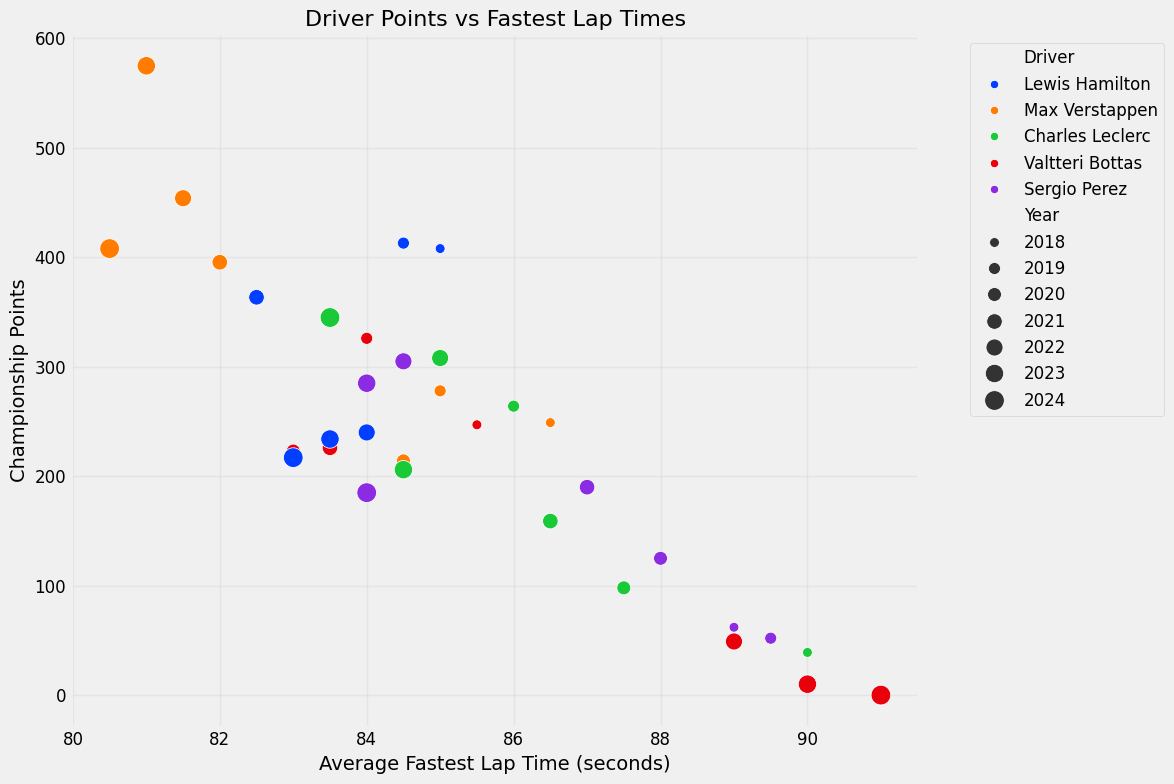

In [17]:
# 6. PERFORMANCE ANALYSIS: Fastest Lap Times vs Points
# Analyze how lap time performance correlates with championship points
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Fastest_Lap_Times', y='Driver_Points',
                hue='Driver', size='Year', sizes=(50, 200), data=df)
plt.title('Driver Points vs Fastest Lap Times', fontsize=16)
plt.xlabel('Average Fastest Lap Time (seconds)', fontsize=14)
plt.ylabel('Championship Points', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# PREDICTIVE MODELING: MULTIPLE LINEAR REGRESSION

In [18]:
# Prepare features (X) and target variable (y)
X = df[['Driver_Experience', 'Avg_Qualifying_Position', 'Avg_Race_Position',
        'Pit_Stops', 'Fastest_Lap_Times']]  # Independent variables
y = df['Driver_Points']  # Dependent variable (what we want to predict)

In [19]:
# Split data into training (80%) and testing (20%) sets for model validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Build and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)  # Train model on training data

LinearRegression()

In [21]:
# Evaluate model performance on test data
y_pred = model.predict(X_test)  # Generate predictions
mse = mean_squared_error(y_test, y_pred)  # Calculate mean squared error
r2 = r2_score(y_test, y_pred)  # Calculate R-squared value

In [22]:
# Display model evaluation metrics
print("\nModel Evaluation on Test Data:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.4f}")


Model Evaluation on Test Data:
Mean Squared Error: 5019.76
R-squared Score: 0.6782


In [23]:
# Analyze feature importance through coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nModel Coefficients:")
print(coefficients)


Model Coefficients:
                   Feature  Coefficient
0        Driver_Experience     4.882582
1  Avg_Qualifying_Position    -1.133748
2        Avg_Race_Position   -48.936203
3                Pit_Stops   291.279946
4        Fastest_Lap_Times     1.803741


# MODEL VALIDATION VISUALIZATIONS

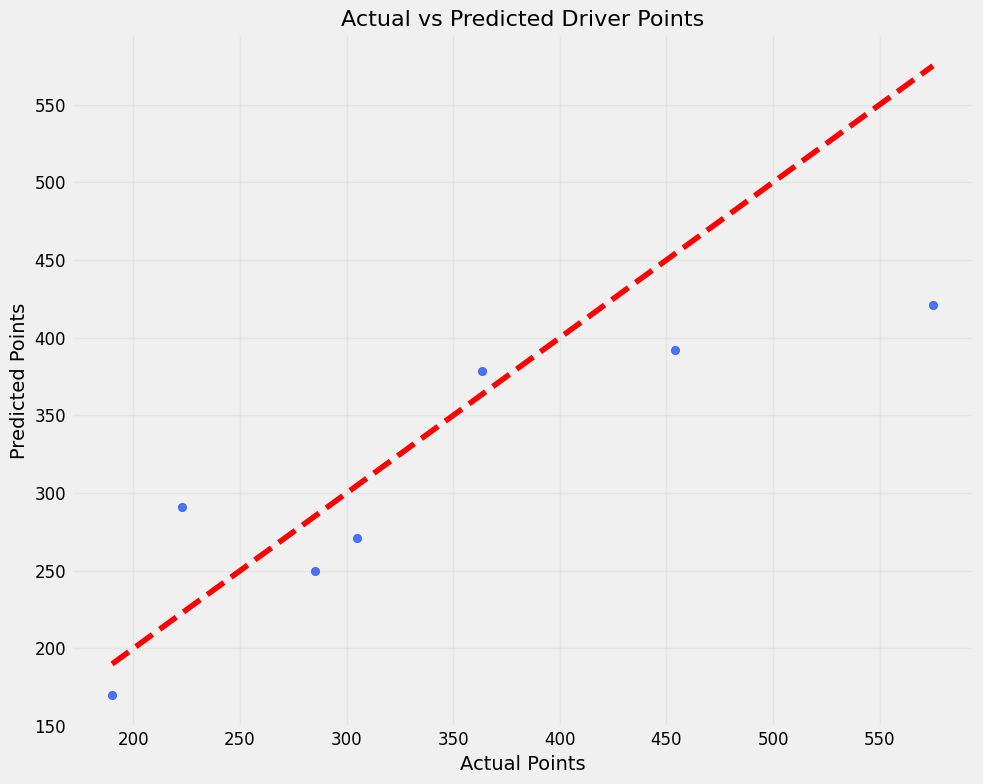

In [102]:
# Visualize prediction accuracy: Actual vs Predicted Points
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.title('Actual vs Predicted Driver Points', fontsize=16)
plt.xlabel('Actual Points', fontsize=14)
plt.ylabel('Predicted Points', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

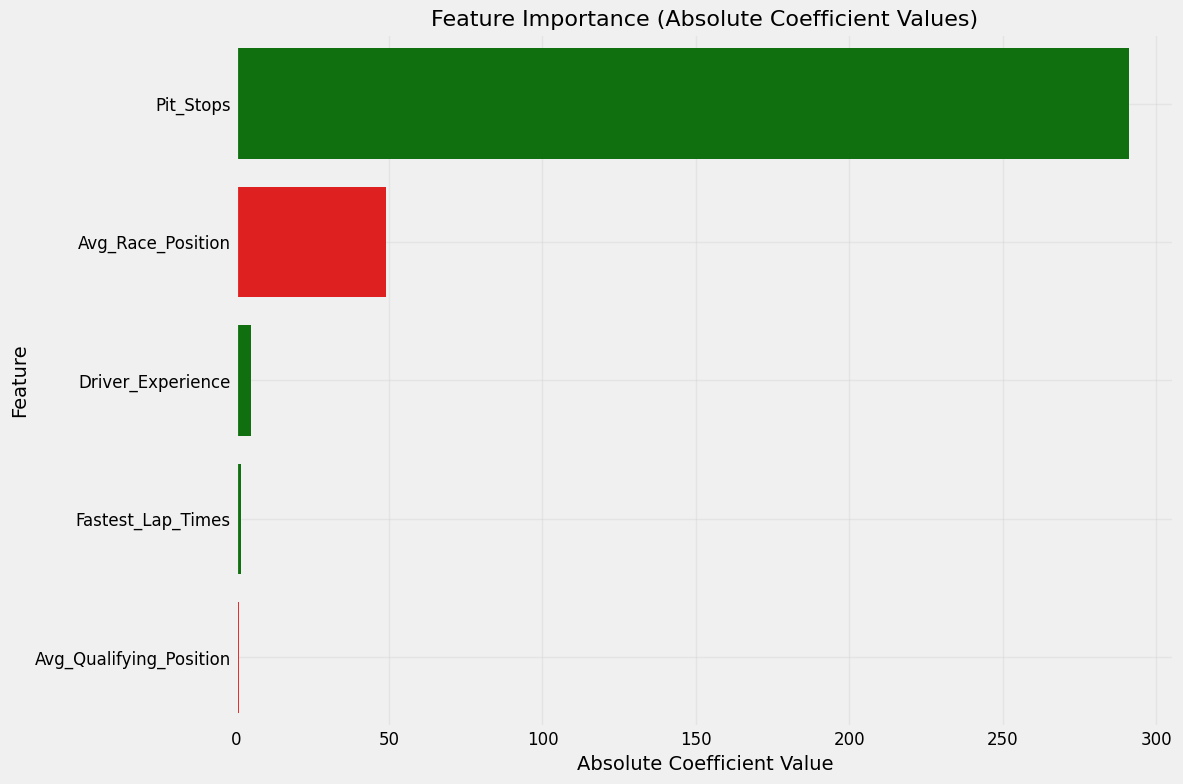

In [104]:
# Visualize Feature Importance through coefficient values
plt.figure(figsize=(12, 8))
coefficients['abs_coef'] = abs(coefficients['Coefficient'])  # Take absolute value for ranking
coefficients = coefficients.sort_values('abs_coef', ascending=False)  # Sort by importance

# Color-code: green for positive impact, red for negative impact
colors = ['green' if c > 0 else 'red' for c in coefficients['Coefficient']]
sns.barplot(x='abs_coef', y='Feature', data=coefficients, palette=colors)
plt.title('Feature Importance (Absolute Coefficient Values)', fontsize=16)
plt.xlabel('Absolute Coefficient Value', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# PREDICTIVE ANALYSIS: 2025 SEASON PROJECTIONS

In [79]:
# Extract 2024 data as baseline for 2025 predictions
drivers_2024 = df[df['Year'] == 2024].copy()

In [80]:
# Project 2025 data by incrementing driver experience while keeping other metrics constant
drivers_2025 = drivers_2024.copy()
drivers_2025['Year'] = 2025  # Set projected year
drivers_2025['Driver_Experience'] += 1  # Add one year of experience to all drivers

In [81]:
# Add Lando Norris to the 2025 season projections
lando_norris = pd.DataFrame({
    'Year': [2025],
    'Driver': ['Lando Norris'],
    'Driver_Experience': [7],  # 7th season in 2025
    'Avg_Qualifying_Position': [3.5],  # Estimated qualifying performance
    'Avg_Race_Position': [3.0],  # Estimated race performance
    'Pit_Stops': [2.0],  # Average pit stops per race
    'Fastest_Lap_Times': [82.0],  # Estimated fastest lap time in seconds
    'Driver_Points': [None]  # Points to be predicted by model
})

In [82]:
# Add Oscar Piastri to the 2025 season projections
oscar_piastri = pd.DataFrame({
    'Year': [2025],
    'Driver': ['Oscar Piastri'],
    'Driver_Experience': [3],  # 3rd season in 2025 (debuted in 2023)
    'Avg_Qualifying_Position': [4.2],  # Estimated qualifying performance
    'Avg_Race_Position': [4.5],  # Estimated race performance
    'Pit_Stops': [1.9],  # Average pit stops per race
    'Fastest_Lap_Times': [82.5],  # Estimated fastest lap time in seconds
    'Driver_Points': [None]  # Points to be predicted by model
})

In [83]:
# Combine existing drivers with new additions for 2025 projections
drivers_2025 = pd.concat([drivers_2025, lando_norris, oscar_piastri], ignore_index=True)

In [84]:
# Prepare feature matrix for 2025 prediction
X_2025 = drivers_2025[['Driver_Experience', 'Avg_Qualifying_Position',
                       'Avg_Race_Position', 'Pit_Stops', 'Fastest_Lap_Times']]

In [85]:
# Generate points predictions for 2025
predicted_points_2025 = model.predict(X_2025)

In [86]:
# Enforce non-negative points (realistic constraint)
predicted_points_2025 = np.maximum(predicted_points_2025, 0)

In [87]:
# Add predictions to the 2025 dataframe and round to integers
drivers_2025['Predicted_Points'] = np.round(predicted_points_2025).astype(int)

In [88]:
# Sort by predicted points to generate championship standings
drivers_2025 = drivers_2025.sort_values('Predicted_Points', ascending=False).reset_index(drop=True)

In [89]:
# Display 2025 championship prediction results
print("\n2025 F1 Championship Predictions:")
print(drivers_2025[['Driver', 'Driver_Experience', 'Avg_Qualifying_Position',
                    'Avg_Race_Position', 'Pit_Stops', 'Fastest_Lap_Times', 'Predicted_Points']])


2025 F1 Championship Predictions:
            Driver  Driver_Experience  Avg_Qualifying_Position  \
0   Max Verstappen                 11                      2.0   
1     Lando Norris                  7                      3.5   
2  Charles Leclerc                  8                      4.5   
3   Lewis Hamilton                 19                      6.0   
4     Sergio Perez                 15                      7.0   
5    Oscar Piastri                  3                      4.2   
6  Valtteri Bottas                 13                     14.0   

   Avg_Race_Position  Pit_Stops  Fastest_Lap_Times  Predicted_Points  
0                1.5        2.0               80.5               405  
1                3.0        2.0               82.0               313  
2                4.0        2.1               83.5               300  
3                6.0        2.0               83.0               224  
4                6.5        2.1               84.0               210  
5         

In [90]:
# Highlight the predicted champion
champion = drivers_2025.iloc[0]['Driver']
champion_points = drivers_2025.iloc[0]['Predicted_Points']
print(f"\nPredicted 2025 F1 Champion: {champion} with {champion_points} points")


Predicted 2025 F1 Champion: Max Verstappen with 405 points


In [107]:
# Highlight Lando Norris's predicted position
norris_row = drivers_2025[drivers_2025['Driver'] == 'Lando Norris']
if not norris_row.empty:
    norris_position = norris_row.index[0] + 1  # Add 1 because index is 0-based
    norris_points = norris_row['Predicted_Points'].values[0]
    print(f"\nLando Norris's predicted position: {norris_position}th with {norris_points} points")


Lando Norris's predicted position: 2th with 313 points


In [91]:
# Highlight Oscar Piastri's predicted position
piastri_row = drivers_2025[drivers_2025['Driver'] == 'Oscar Piastri']
if not piastri_row.empty:
    piastri_position = piastri_row.index[0] + 1  # Add 1 because index is 0-based
    piastri_points = piastri_row['Predicted_Points'].values[0]
    print(f"\nOscar Piastri's predicted position: {piastri_position}th with {piastri_points} points")


Oscar Piastri's predicted position: 6th with 191 points


# CHAMPIONSHIP PREDICTION VISUALIZATION

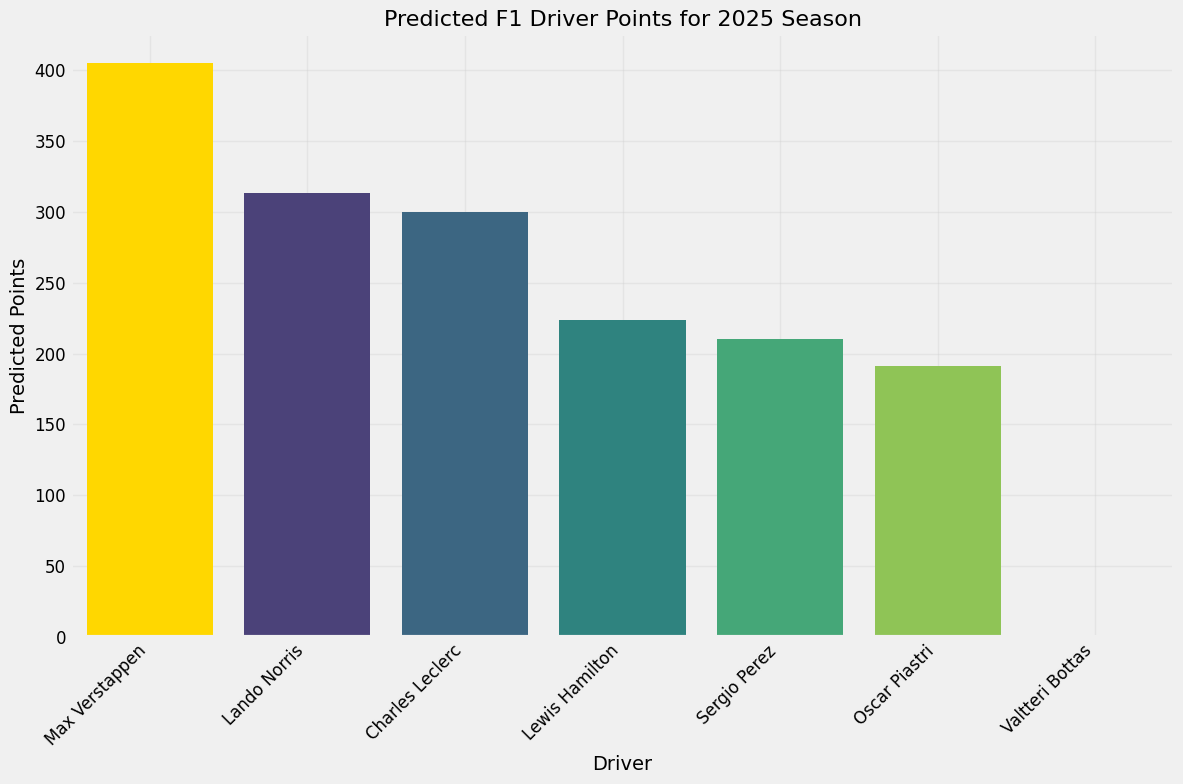

In [96]:
# Visualize 2025 championship predictions
plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(drivers_2025)))  # Color gradient for drivers
ax = sns.barplot(x='Driver', y='Predicted_Points', data=drivers_2025, palette=colors)
plt.title('Predicted F1 Driver Points for 2025 Season', fontsize=16)
plt.xlabel('Driver', fontsize=14)
plt.ylabel('Predicted Points', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate labels for readability
plt.grid(True, alpha=0.3)

# Highlight the predicted champion with a gold bar
champion_idx = drivers_2025.index[drivers_2025['Driver'] == champion][0]
ax.patches[champion_idx].set_facecolor('gold')

plt.tight_layout()
plt.show()

# FINAL REPORTING AND OUTPUT

In [97]:
# Generate final 2025 championship prediction table with rankings
drivers_2025['Rank'] = range(1, len(drivers_2025) + 1)  # Add rank column
prediction_table = drivers_2025[['Rank', 'Driver', 'Predicted_Points']]
prediction_table = prediction_table.rename(columns={'Predicted_Points': 'Points'})

print("\nFinal 2025 F1 Championship Prediction Table:")
print(prediction_table)

# Display comprehensive model summary for transparency
print("\nFull Model Summary:")
print(f"Intercept: {model.intercept_:.2f}")
print("Regression Equation:")
equation = f"Points = {model.intercept_:.2f}"
for i, feature in enumerate(X.columns):
    equation += f" + ({model.coef_[i]:.2f} × {feature})"
print(equation)


Final 2025 F1 Championship Prediction Table:
   Rank           Driver  Points
0     1   Max Verstappen     405
1     2     Lando Norris     313
2     3  Charles Leclerc     300
3     4   Lewis Hamilton     224
4     5     Sergio Perez     210
5     6    Oscar Piastri     191
6     7  Valtteri Bottas       0

Full Model Summary:
Intercept: -300.75
Regression Equation:
Points = -300.75 + (4.88 × Driver_Experience) + (-1.13 × Avg_Qualifying_Position) + (-48.94 × Avg_Race_Position) + (291.28 × Pit_Stops) + (1.80 × Fastest_Lap_Times)


# MODEL VALIDATION BY YEAR


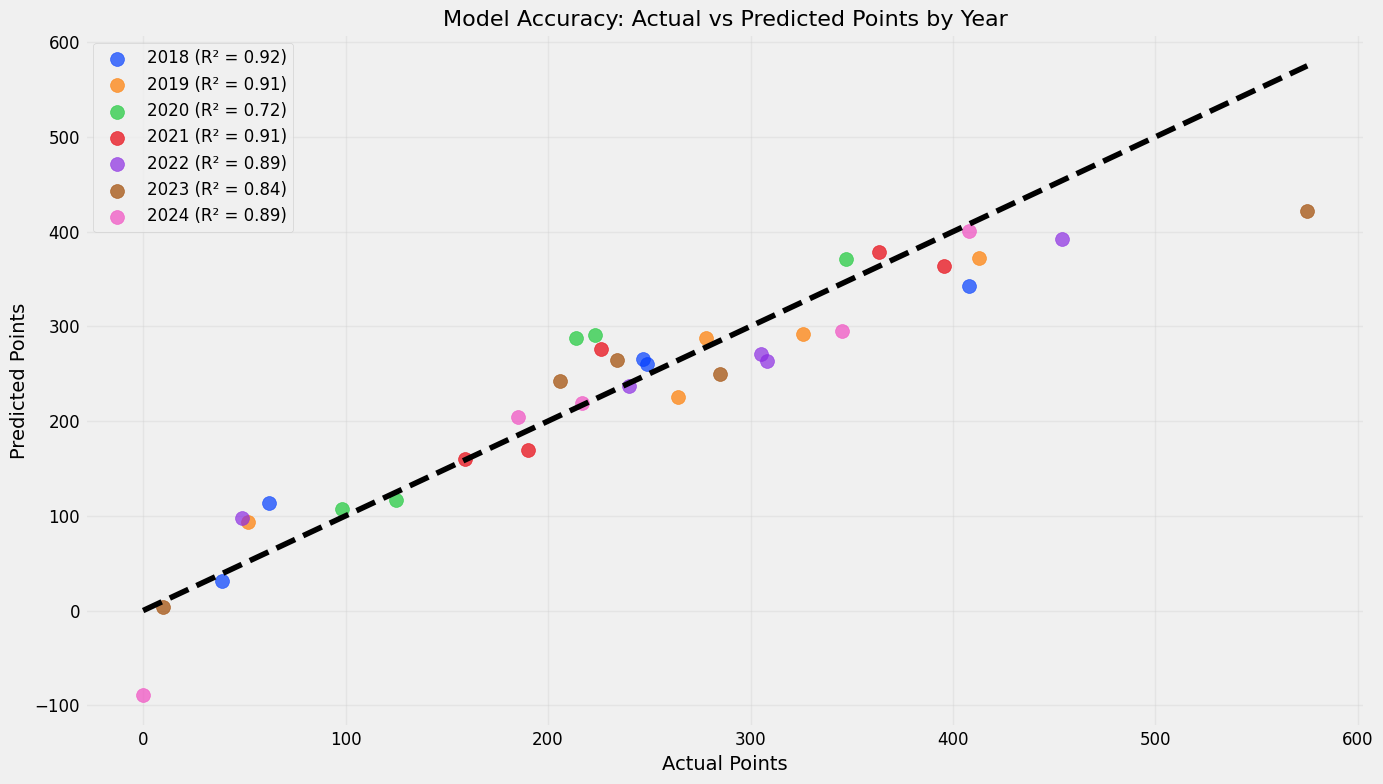

In [98]:
# Analyze model performance on historical data by year
plt.figure(figsize=(14, 8))
for year in sorted(df['Year'].unique()):
    # Extract data for specific year
    year_data = df[df['Year'] == year]
    X_year = year_data[['Driver_Experience', 'Avg_Qualifying_Position',
                       'Avg_Race_Position', 'Pit_Stops', 'Fastest_Lap_Times']]
    y_year = year_data['Driver_Points']

    # Generate predictions for that year
    y_pred_year = model.predict(X_year)

    # Calculate R² score for year-specific performance
    r2_year = r2_score(y_year, y_pred_year)

    # Plot actual vs predicted for each year with R² in legend
    plt.scatter(y_year, y_pred_year, label=f'{year} (R² = {r2_year:.2f})', s=100, alpha=0.7)

# Add perfect prediction reference line
plt.plot([0, df['Driver_Points'].max()], [0, df['Driver_Points'].max()], 'k--')
plt.title('Model Accuracy: Actual vs Predicted Points by Year', fontsize=16)
plt.xlabel('Actual Points', fontsize=14)
plt.ylabel('Predicted Points', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# ADVANCED FEATURE ENGINEERING

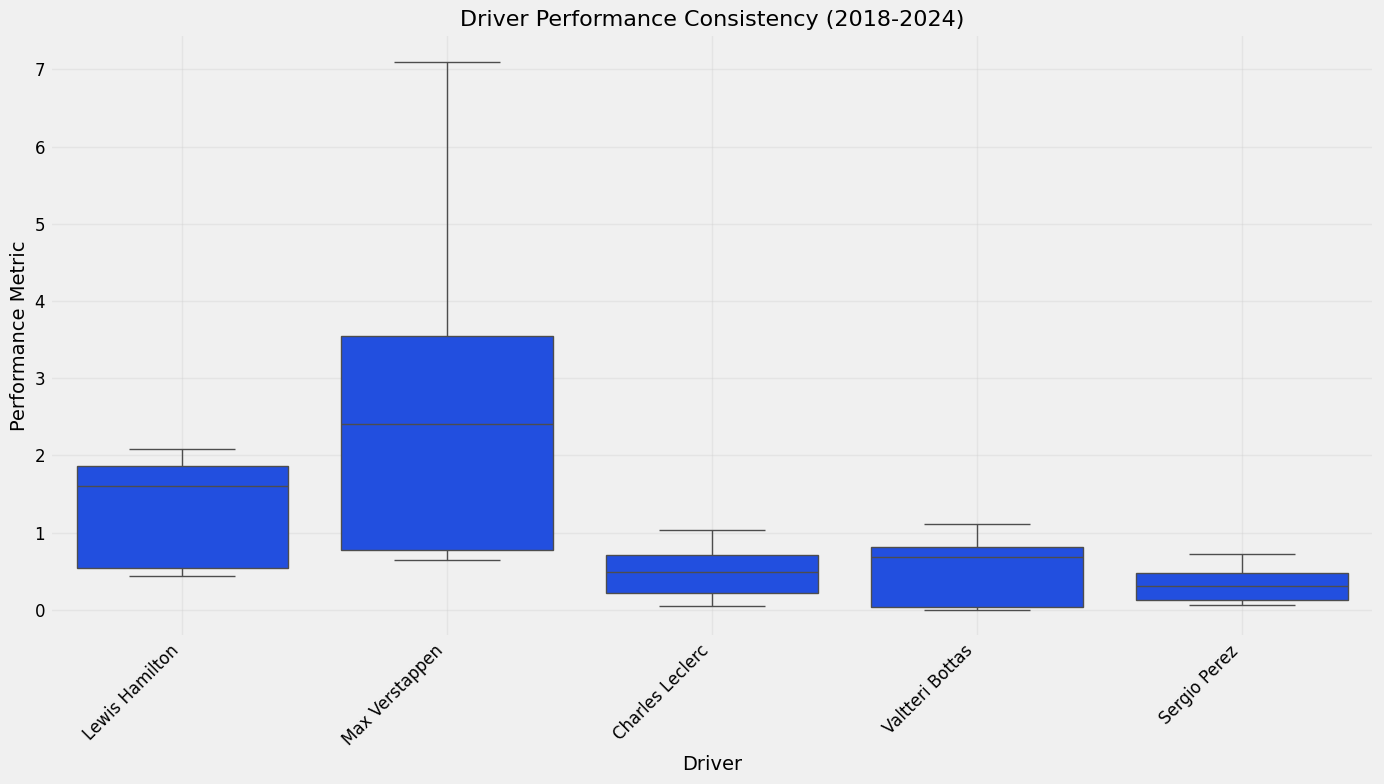


Analysis Complete!


In [100]:
# Create a composite performance metric to evaluate driver efficiency
# (Higher points per position and faster lap times indicate better performance)
df['Performance_Metric'] = (df['Driver_Points'] /
                            (df['Avg_Race_Position'] * df['Fastest_Lap_Times']))

# Visualize driver performance consistency using the new metric
plt.figure(figsize=(14, 8))
sns.boxplot(x='Driver', y='Performance_Metric', data=df)
plt.title('Driver Performance Consistency (2018-2024)', fontsize=16)
plt.xlabel('Driver', fontsize=14)
plt.ylabel('Performance Metric', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Analysis completion notification
print("\nAnalysis Complete!")